<a href="https://colab.research.google.com/github/marcspim/EBAC_mod_10/blob/main/Profissao_Cientista_de_Dados_M10_Pratique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo Visualização de Dados:

Leia o arquivo ecommerce_preparados.csv’ dentro de um dataframe  

Faça uma análise detalhada dos dados, descubra quais dados gostaria de destacar e crie os seguintes gráficos:


*   1 Gráfico de dispersão
*   1 Mapa de calor
*   1 Gráfico de barra
*   1 Gráfico de pizza
*   1 Gráfico de densidade

Adicione títulos nos gráficos e nos eixos para ficar claro os objetivos dos gráficos.

Fiquem a vontade para escolher a biblioteca que quiserem, não esqueçam de comentar os códigos.

Essa atividade é um pouco diferente, vocês terão que construir os códigos nesse arquivo e enviar ou o arquivo ou o link do github com o arquivo publicado para os tutores.

Saving ecommerce_preparados.csv to ecommerce_preparados (4).csv
   Unnamed: 0                                                        Título  Nota  N_Avaliações  \
0           0  Pijama Cirurgico  Scrub Roupa Privativa Hospitalar - Unissex   4.0         273.0   
1           1  Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Masculina Atacado   4.5        3034.0   
2           2         Kit Com 10 Cuecas Boxer Algodão Sem Costura Zorba 781   4.7        5682.0   
3           3   Kit 10 Cuecas Boxer Mash Algodão Cotton Box Original Oferta   4.6        1700.0   
4           4        Kit 3 Short Jeans Feminino Cintura Alta Barato Atacado   4.4         507.0   

   Desconto                            Marca   Material      Gênero        Temporada  \
0       NaN  toronto uniformes profissionais  poliéster  Sem gênero     não definido   
1      18.0                             lupo    algodão   Masculino   outono/inverno   
2      20.0                            zorba    algodão   Masculino     não d

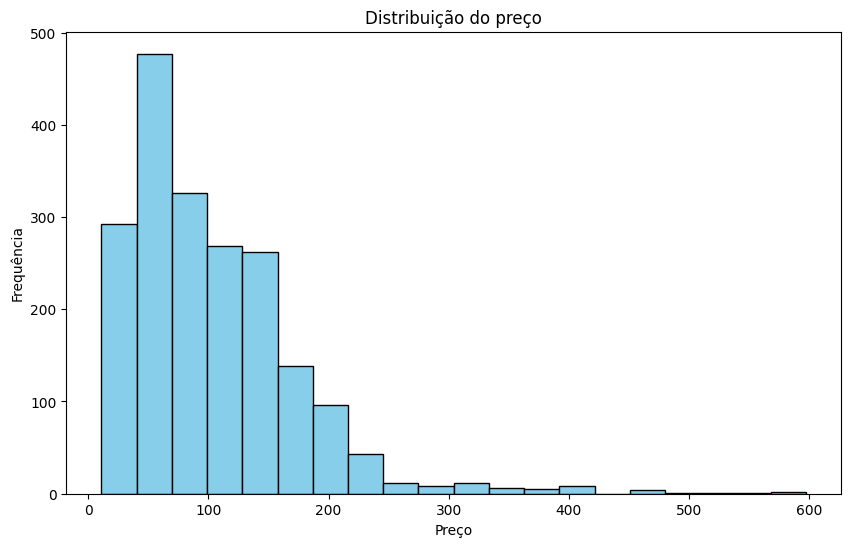

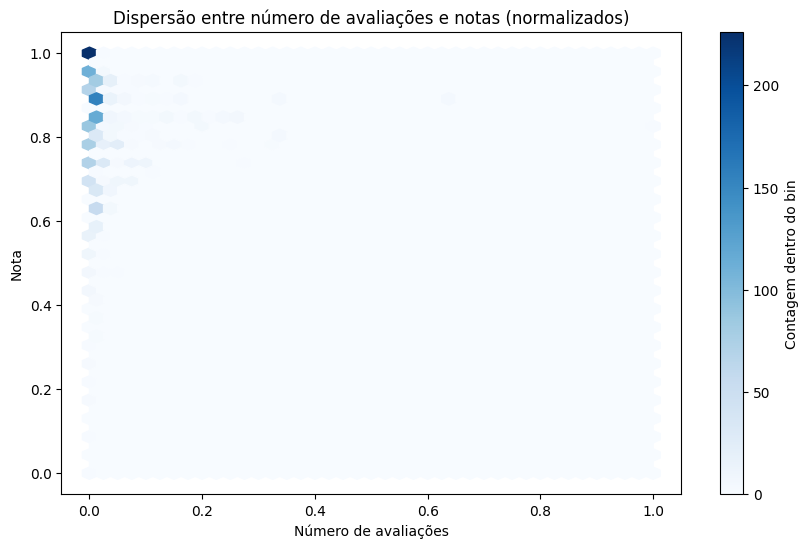

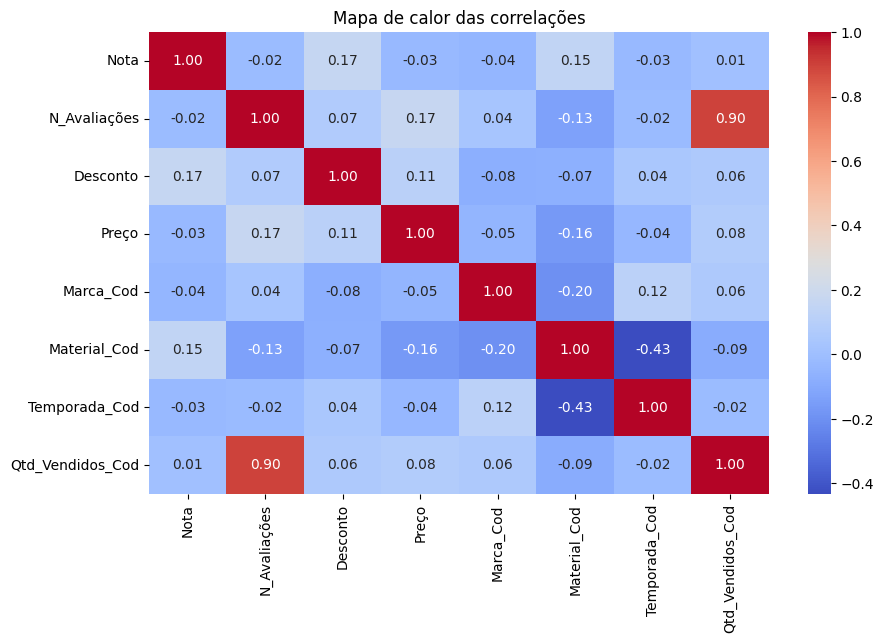

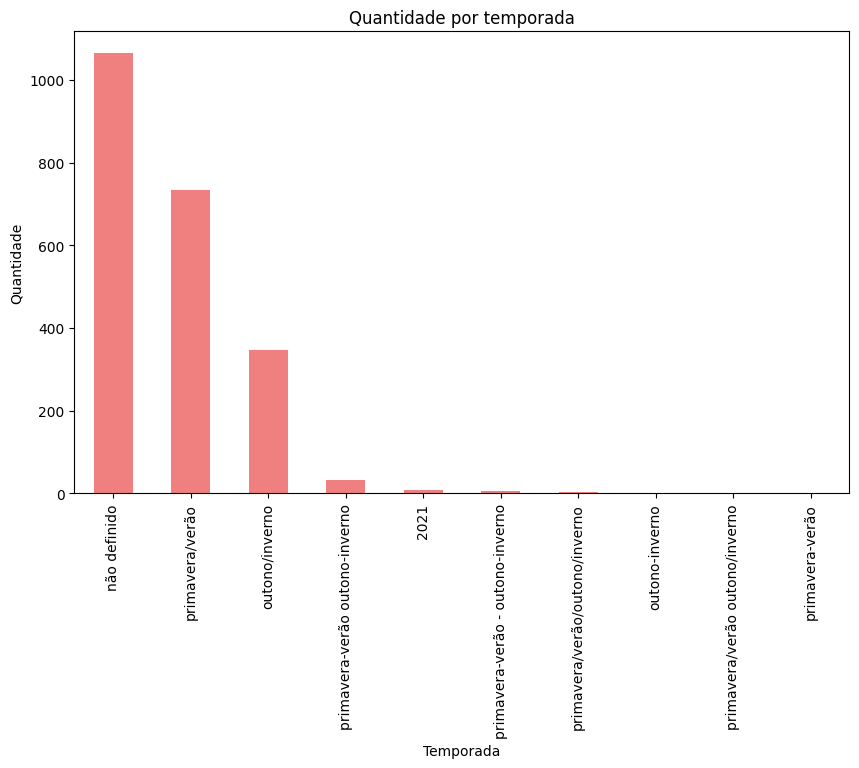

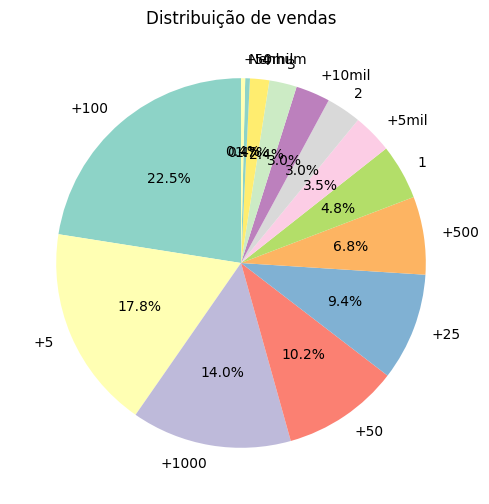

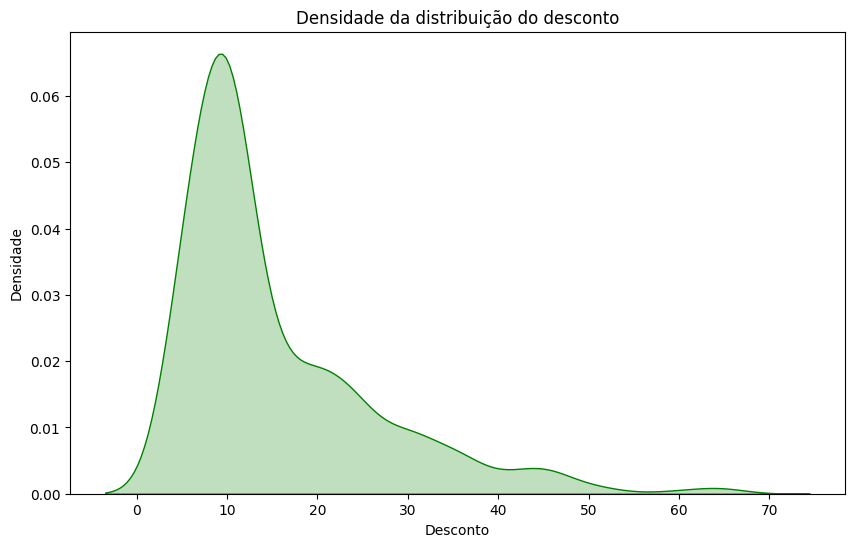

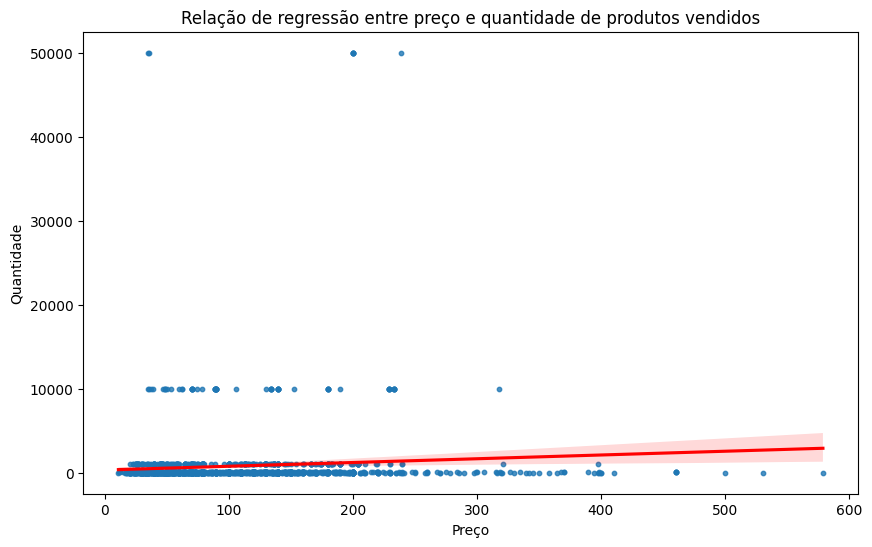

In [8]:
# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io

# Importando o arquivo para análise
from google.colab import files
uploaded = files.upload()

pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Carregar o arquivo para um DataFrame
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Exibindo as primeiras linhas para entender a estrutura dos dados
print(df.head())

# Exibindo as informações do DataFrame
print(df.info())

# Gráfico de histograma
plt.figure(figsize=(10, 6))
plt.hist(df['Preço'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição do preço')  # Título do gráfico
plt.xlabel('Preço')  # Título do eixo X
plt.ylabel('Frequência')  # Título do eixo Y
plt.show()

# Gráfico de dispersão
plt.figure(figsize=(10,6))
plt.hexbin(df['N_Avaliações_MinMax'], df['Nota_MinMax'], gridsize=40, cmap='Blues')
plt.colorbar(label='Contagem dentro do bin')
plt.title('Dispersão entre número de avaliações e notas (normalizados)')  # Título do gráfico
plt.xlabel('Número de avaliações')  # Título do eixo X
plt.ylabel('Nota')  # Título do eixo Y
plt.show()

# Mapa de calor
plt.figure(figsize=(10, 6))
df_hm = df[['Nota', 'N_Avaliações', 'Desconto', 'Preço', 'Marca_Cod', 'Material_Cod', 'Temporada_Cod', 'Qtd_Vendidos_Cod']]  # Selecionando variáveis para exibição
corr = df_hm.corr()  # Cálculo da correlação
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor das correlações')  # Título do gráfico
plt.show()

# Gráfico de barra
plt.figure(figsize=(10, 6))
category_sales = df['Temporada'].value_counts()  # Definindo as variáveis
category_sales.plot(kind='bar', color='lightcoral')
plt.title('Quantidade por temporada')  # Título do gráfico
plt.xlabel('Temporada')  # Título do eixo X
plt.ylabel('Quantidade')  # Título do eixo Y
plt.xticks(rotation=90)
plt.show()

# Gráfico de pizza
plt.figure(figsize=(10, 6))
category_counts = df['Qtd_Vendidos'].value_counts()
category_counts.plot(kind='pie', autopct='%.1f%%', startangle=90, colors=sns.color_palette('Set3', len(category_counts)))
plt.title('Distribuição de vendas')
plt.ylabel('')  # Remover o rótulo do eixo y
plt.show()

# Gráfico de densidade
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Desconto'], fill=True, color='green')
plt.title('Densidade da distribuição do desconto')  # Título do gráfico
plt.xlabel('Desconto')  # Título do eixo X
plt.ylabel('Densidade')  # Título do eixo Y
plt.show()

# Gráfico de regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='Preço', y='Qtd_Vendidos_Cod', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Relação de regressão entre preço e quantidade de produtos vendidos')  # Título do gráfico
plt.xlabel('Preço')  # Título do eixo X
plt.ylabel('Quantidade')  # Título do eixo Y
plt.show()
